In [1]:
path = '/home/hj19/Data/rain'


In [2]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, MaxPooling2D, BatchNormalization, concatenate, Input
from tensorflow.keras import Model

import warnings
warnings.filterwarnings("ignore")

In [41]:
train_files = glob.glob('train/*.npy')
len(train_files)

62735

In [4]:
import random 

train=random.sample(train_files,55000)

train[:5]

['train/train_31985.npy',
 'train/train_23518.npy',
 'train/train_54682.npy',
 'train/train_41713.npy',
 'train/train_33401.npy']

In [42]:
import random 

val=random.sample(train_files,10000)

train1[:5]

['train/train_15904.npy',
 'train/train_33681.npy',
 'train/train_45816.npy',
 'train/train_08658.npy',
 'train/train_22687.npy']

In [43]:
train=list(set(train_files)-set(val))

In [44]:
len(train)

52735

In [8]:
train_files

['train/train_04053.npy',
 'train/train_28948.npy',
 'train/train_32923.npy',
 'train/train_19427.npy',
 'train/train_36295.npy',
 'train/train_10393.npy',
 'train/train_44485.npy',
 'train/train_46974.npy',
 'train/train_42230.npy',
 'train/train_48395.npy',
 'train/train_39531.npy',
 'train/train_32279.npy',
 'train/train_35339.npy',
 'train/train_22494.npy',
 'train/train_17826.npy',
 'train/train_32808.npy',
 'train/train_37307.npy',
 'train/train_38622.npy',
 'train/train_53732.npy',
 'train/train_50350.npy',
 'train/train_02855.npy',
 'train/train_34526.npy',
 'train/train_17442.npy',
 'train/train_29962.npy',
 'train/train_24176.npy',
 'train/train_62637.npy',
 'train/train_41677.npy',
 'train/train_37359.npy',
 'train/train_16317.npy',
 'train/train_51778.npy',
 'train/train_39685.npy',
 'train/train_41595.npy',
 'train/train_18403.npy',
 'train/train_02617.npy',
 'train/train_12326.npy',
 'train/train_08118.npy',
 'train/train_17421.npy',
 'train/train_58125.npy',
 'train/trai

def trainGenerator():
    for file in train:
        dataset = np.load(file)
        target= dataset[:,:,-1].reshape(120,120,1)
        target=np.expand_dims(target,axis=0)
        remove_minus = np.where(target < 0, 0, target)
        feature = dataset[:,:,:4]
        feature=np.expand_dims(feature, axis=0)

       

        yield (feature, remove_minus)
        
train_dataset = tf.data.Dataset.from_generator(trainGenerator, (tf.float32, tf.float32), (tf.TensorShape([None,120,120,4]),tf.TensorShape([None,120,120,1])))
train_dataset = train_dataset.batch(128).prefetch(1)

In [9]:
for file in train:
        dataset = np.load(file)
        target= dataset[:,:,-1].reshape(120,120,1)
        target=np.expand_dims(target,axis=0)
        #print(target.shape)
        remove_minus = np.where(target < 0, 0, target)
        feature = dataset[:,:,:4]
        feature=np.expand_dims(feature, axis=0)
        print(feature.shape)

(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 

(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 

(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 

(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 

(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 

(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 

(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 

(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 

(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 

(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 

(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 

(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 

(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 

(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 

(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 

(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 

(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 

(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 

(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 

(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 

(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 

(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 

(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 

(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 

(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 

(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 

(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 

(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 

(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 

(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 

(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 

(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 

(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 

(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 

(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 

(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 

(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 

(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 

(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 

(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 

(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 

(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 

(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 

(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 

(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 

(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 

(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 

(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 

(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 

(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 

(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 

(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 

(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 

(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 

(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 

(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 

(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 

(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 

(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 

(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 

(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 

(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 

(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 

(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 

(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 

(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 

(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 

(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 

(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 

(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 

(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 

(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 

(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 

(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 4)
(1, 120, 120, 

In [10]:
dataset = np.load(file)

feature = dataset[:,:,:4]
feature.shape

(120, 120, 4)

In [45]:


def trainGenerator():
    for file in train:
        dataset = np.load(file)
        target= dataset[:,:,-1].reshape(120,120,1)
        remove_minus = np.where(target < 0, 0, target)
        feature = dataset[:,:,:4]

       

        yield (feature, remove_minus)
        
train_dataset = tf.data.Dataset.from_generator(trainGenerator, (tf.float32, tf.float32), (tf.TensorShape([120,120,4]),tf.TensorShape([120,120,1])))
train_dataset = train_dataset.batch(128).prefetch(1)

def valGenerator():
    for file in val:
        dataset = np.load(file)
        target= dataset[:,:,-1].reshape(120,120,1)
        target=np.expand_dims(target,axis=0)

        remove_minus = np.where(target < 0, 0, target)
        feature = dataset[:,:,:4]
        feature=np.expand_dims(feature, axis=0)


        yield (feature, remove_minus)
        
val_dataset = tf.data.Dataset.from_generator(valGenerator, (tf.float32, tf.float32), (tf.TensorShape([None,120,120,4]),tf.TensorShape([None,120,120,1])))
val_dataset = val_dataset.batch(128).prefetch(1)

In [46]:
def valGenerator():
    for file in val:
        dataset = np.load(file)
        target= dataset[:,:,-1].reshape(120,120,1)

        remove_minus = np.where(target < 0, 0, target)
        feature = dataset[:,:,:4]


        yield (feature, remove_minus)
        
val_dataset = tf.data.Dataset.from_generator(valGenerator, (tf.float32, tf.float32), (tf.TensorShape([120,120,4]),tf.TensorShape([120,120,1])))
val_dataset = val_dataset.batch(128).prefetch(1)

In [13]:
color_map = plt.cm.get_cmap('RdBu')
color_map = color_map.reversed()
image_sample = np.load(val[40])

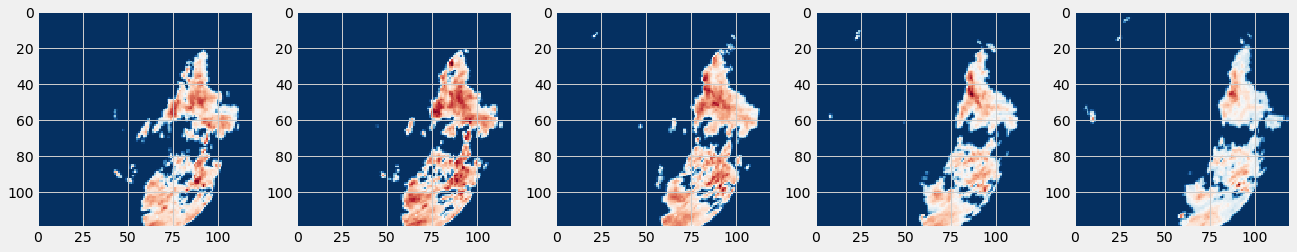

In [14]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20, 20))

for i in range(4):
    plt.subplot(1,5,i+1)
    plt.imshow(image_sample[:, :, i], cmap=color_map)

plt.subplot(1,5,5)
plt.imshow(image_sample[:,:,-1], cmap = color_map)
plt.show()

In [16]:
from tensorflow.keras.layers import Reshape,LeakyReLU,UpSampling2D,Input, Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D, MaxPool2D, Convolution2D, ReLU, GlobalAveragePooling2D

In [ ]:
def base_model(input_layer, start_neurons):
    
    conv1 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(input_layer)
    pool1 = BatchNormalization()(conv1)
    pool1 = MaxPooling2D((2, 2))(pool1)

    conv2 = Conv2D(start_neurons * 2, (3, 3), activation="relu", padding="same")(pool1)
    pool2 = BatchNormalization()(conv2)
    pool2 = MaxPooling2D((2, 2))(pool2)

    convm = Conv2D(start_neurons * 4, (3, 3), activation="relu", padding="same")(pool2)

    deconv2 = Conv2DTranspose(start_neurons * 2, (3, 3), strides=(2, 2), padding="same")(convm)
    uconv2 = concatenate([deconv2, conv2])
    uconv2 = Conv2D(start_neurons * 2, (3, 3), activation="relu", padding="same")(uconv2)
    uconv2 = BatchNormalization()(uconv2)

    deconv1 = Conv2DTranspose(start_neurons * 1, (3, 3), strides=(2, 2), padding="same")(uconv2)
    uconv1 = concatenate([deconv1, conv1])
    uconv1 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(uconv1)
    uconv1 = BatchNormalization()(uconv1)
    output_layer = Conv2D(1, (1,1), padding="same", activation='relu')(uconv1)
    
    return output_layer

input_layer = Input((120, 120, 4))
output_layer = base_model(input_layer,32)

In [37]:
def base_model(input_layer, start_neurons):
    
    conv1 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(input_layer)
    pool1 = BatchNormalization()(conv1)
    pool1 = MaxPooling2D((2, 2))(pool1)


    conv2 = Conv2D(start_neurons * 2, (3, 3), activation="relu", padding="same")(pool1)
    pool2 = BatchNormalization()(conv2)
    pool2 = MaxPooling2D((2, 2))(pool2)
    pool2 = Dropout(0.3)(pool2)
    
    convm = Conv2D(start_neurons * 8, (3, 3), activation="relu", padding="same")(pool2)

    deconv2 = Conv2DTranspose(start_neurons * 4, (3, 3), strides=(2, 2), padding="same")(convm)
    uconv2 = concatenate([deconv2, conv2])
    uconv2 = Conv2D(start_neurons * 4, (3, 3), activation="relu", padding="same")(uconv2)
    uconv2 = BatchNormalization()(uconv2)
    
    deconv1 = Conv2DTranspose(start_neurons * 1, (3, 3), strides=(2, 2), padding="same")(uconv2)
    uconv1 = concatenate([deconv1, conv1])
    uconv1 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(uconv1)
    uconv1 = BatchNormalization()(uconv1)
    #uconv1 = Dropout(0.2)(uconv1)
    
    output_layer = Conv2D(1, (1,1), padding="same", activation='relu')(uconv1)
    
    return output_layer

input_layer = Input((120, 120, 4))
output_layer = base_model(input_layer,32)

In [22]:
model.save('saved_models/bestmodel1') 

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: saved_models/bestmodel1/assets


In [15]:
model = Model(input_layer, output_layer)


In [47]:
def base_modeladd(input_layer, start_neurons):
    
    conv1 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(input_layer)
    pool1 = BatchNormalization()(conv1)
    pool1 = MaxPooling2D((2, 2))(pool1)

    conv2 = Conv2D(start_neurons * 2, (3, 3), activation="relu", padding="same")(pool1)
    pool2 = BatchNormalization()(conv2)
    pool2 = MaxPooling2D((2, 2))(pool2)

    
    conv3 = Conv2D(start_neurons * 4, (3, 3), activation="relu", padding="same")(pool2)
    pool3 = BatchNormalization()(conv3)
    pool3 = MaxPooling2D((2, 2))(pool3)

    



    convm = Conv2D(start_neurons * 8, (3, 3), activation="relu", padding="same")(pool3)


    
    deconv3 = Conv2DTranspose(start_neurons * 4, (3, 3), strides=(2, 2), padding="same")(convm)
    uconv3 = concatenate([deconv3, conv3])
    uconv3 = Conv2D(start_neurons * 4, (3, 3), activation="relu", padding="same")(uconv3)
    uconv3 = BatchNormalization()(uconv3)
    
    
    deconv2 = Conv2DTranspose(start_neurons * 2, (3, 3), strides=(2, 2), padding="same")(uconv3)
    uconv2 = concatenate([deconv2, conv2])
    uconv2 = Conv2D(start_neurons * 2, (3, 3), activation="relu", padding="same")(uconv2)
    uconv2 = BatchNormalization()(uconv2)
    #uconv2 = Dropout(0.5)(uconv2)

    deconv1 = Conv2DTranspose(start_neurons * 1, (3, 3), strides=(2, 2), padding="same")(uconv2)
    uconv1 = concatenate([deconv1, conv1])
    uconv1 = Conv2D(start_neurons * 1, (3, 3), activation="relu", padding="same")(uconv1)
    uconv1 = BatchNormalization()(uconv1)
    
    output_layer = Conv2D(1, (1,1), padding="same", activation='relu')(uconv1)
    
    return output_layer

input_layer = Input((120, 120, 4))
output_layer = base_modeladd(input_layer,32)

In [38]:
from tensorflow.keras.callbacks import ReduceLROnPlateau, LearningRateScheduler, ModelCheckpoint

In [48]:
filepath="saved_models/weights-modeladd3.hdf5"
mc = ModelCheckpoint(filepath, monitor='val_loss',mode='min',save_best_only=True, verbose=1)

In [49]:
from tensorflow.keras.optimizers import Adam

In [26]:
#adam=Adam(2e-4, beta_1=0.5)

In [50]:
model = Model(input_layer, output_layer)
model.compile(loss='mae', optimizer='adam')
model.fit(train_dataset,validation_data=val_dataset, epochs = 100, verbose=1,callbacks=[mc])

Epoch 1/100
    412/Unknown - 59s 142ms/step - loss: 7.9337
Epoch 00001: val_loss improved from inf to 3.42774, saving model to saved_models/weights-modeladd3.hdf5
412/412 [==============================] - 66s 160ms/step - loss: 7.9337 - val_loss: 3.4277
Epoch 2/100
412/412 [==============================] - ETA: 0s - loss: 3.2709
Epoch 00002: val_loss improved from 3.42774 to 3.01661, saving model to saved_models/weights-modeladd3.hdf5
412/412 [==============================] - 64s 155ms/step - loss: 3.2709 - val_loss: 3.0166
Epoch 3/100
412/412 [==============================] - ETA: 0s - loss: 3.1103
Epoch 00003: val_loss improved from 3.01661 to 2.93951, saving model to saved_models/weights-modeladd3.hdf5
412/412 [==============================] - 65s 159ms/step - loss: 3.1103 - val_loss: 2.9395
Epoch 4/100
412/412 [==============================] - ETA: 0s - loss: 3.0648
Epoch 00004: val_loss improved from 2.93951 to 2.92366, saving model to saved_models/weights-modeladd3.hdf5
41

KeyboardInterrupt: 

In [23]:
filepath="saved_models/weights-12.hdf5"
mc = ModelCheckpoint(filepath, monitor='val_loss',mode='min',save_best_only=True, verbose=1)

In [ ]:


model = Model(input_layer, output_layer)
model.compile(loss='mae', optimizer='adam')
model.fit(train_dataset,validation_data=val_dataset, epochs = 100, verbose=1,callbacks=[mc])

In [97]:
def autoencoder(input_layer, start_neurons):
    x = Conv2D(start_neurons*2, (3, 3), activation='relu', padding='same')(input_layer)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    
    x = Conv2D(start_neurons*8, (3, 3), activation='relu', padding='same')(x)
    x = BatchNormalization()(x)
    x = MaxPooling2D((2, 2), padding='same')(x)
    x = Conv2D(start_neurons*32, (3, 3), activation='relu', padding='same')(x)
    encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

    x = Conv2D(start_neurons*32, (3, 3), activation='relu', padding='same')(encoded)
    x = UpSampling2D((2, 2))(x)
    x = Conv2D(start_neurons*8, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    x = BatchNormalization()(x)

    x = Conv2D(start_neurons*2, (3, 3), activation='relu', padding='same')(x)
    x = UpSampling2D((2, 2))(x)
    x = BatchNormalization()(x)

    output_layer = Conv2D(1, (1, 1), activation='relu', padding='same')(x)
    
    return output_layer

  
    

In [98]:
input_layer = Input((120, 120, 4))
output_layer = autoencoder(input_layer,32)

In [99]:
model = Model(input_layer, output_layer)
model.compile(optimizer='adam', loss='mae')
model.fit(train_dataset,validation_data=val_dataset, epochs = 10, verbose=1)

Epoch 1/10
79/79 [==============================] - 33s 417ms/step - loss: 10.4805 - val_loss: 11.0255
Epoch 2/10
79/79 [==============================] - 30s 378ms/step - loss: 7.8601 - val_loss: 9.9991
Epoch 3/10
79/79 [==============================] - 30s 381ms/step - loss: 5.4670 - val_loss: 8.4009
Epoch 4/10
79/79 [==============================] - 30s 383ms/step - loss: 4.2242 - val_loss: 4.4416
Epoch 5/10
79/79 [==============================] - 30s 381ms/step - loss: 3.9502 - val_loss: 4.3290
Epoch 6/10
79/79 [==============================] - 30s 376ms/step - loss: 3.9118 - val_loss: 4.1208
Epoch 7/10
79/79 [==============================] - 30s 386ms/step - loss: 3.9453 - val_loss: 4.1035
Epoch 8/10
79/79 [==============================] - 31s 389ms/step - loss: 3.8143 - val_loss: 3.9784
Epoch 9/10
79/79 [==============================] - 30s 374ms/step - loss: 3.7658 - val_loss: 4.1539
Epoch 10/10
79/79 [==============================] - 30s 381ms/step - loss: 3.7312 - val_

In [84]:
filepath="saved_models/weights-modeladd.hdf5"  ##2.73
mc = ModelCheckpoint(filepath, monitor='val_loss',mode='min',save_best_only=True, verbose=1)

In [106]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import ConvLSTM2D

In [109]:
### weight-6 스코어 0.55 
def fn_get_model_convLSTM_tframe_5():
    
    model = Sequential()
    model.add(ConvLSTM2D(filters=16, kernel_size=(3, 3),
                         input_shape=(None, 120, 120, 4), padding='same', return_sequences=True, 
                         activation='tanh', recurrent_activation='hard_sigmoid',
                         kernel_initializer='glorot_uniform', unit_forget_bias=True, 
                         dropout=0, recurrent_dropout=0, go_backwards=True ))
    model.add(BatchNormalization())

    model.add(ConvLSTM2D(filters=8, kernel_size=(3, 3), padding='same', return_sequences=True, 
                         activation='tanh', recurrent_activation='hard_sigmoid', 
                         kernel_initializer='glorot_uniform', unit_forget_bias=True, 
                         dropout=0, recurrent_dropout=0, go_backwards=True ))
    model.add(BatchNormalization())
    
    model.add(ConvLSTM2D(filters=4, kernel_size=(3, 3), padding='same', return_sequences=True, 
                         activation='tanh', recurrent_activation='hard_sigmoid', 
                         kernel_initializer='glorot_uniform', unit_forget_bias=True, 
                         dropout=0.4, recurrent_dropout=0.3, go_backwards=True ))
    model.add(BatchNormalization())


    model.add(ConvLSTM2D(filters=4, kernel_size=(3, 3), padding='same', return_sequences=False, 
                         activation='tanh', recurrent_activation='hard_sigmoid', 
                         kernel_initializer='glorot_uniform', unit_forget_bias=True, 
                         dropout=0.4, recurrent_dropout=0.3, go_backwards=True ))
    model.add(BatchNormalization())
    
    model.add(Conv2D(filters=1, kernel_size=(1, 1),
                   activation='sigmoid',
                   padding='same', data_format='channels_last')) 
    
    print(model.summary())
    return model

In [110]:
model=fn_get_model_convLSTM_tframe_5()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d (ConvLSTM2D)    (None, None, 120, 120, 16 11584     
_________________________________________________________________
batch_normalization_188 (Bat (None, None, 120, 120, 16 64        
_________________________________________________________________
conv_lst_m2d_1 (ConvLSTM2D)  (None, None, 120, 120, 8) 6944      
_________________________________________________________________
batch_normalization_189 (Bat (None, None, 120, 120, 8) 32        
_________________________________________________________________
conv_lst_m2d_2 (ConvLSTM2D)  (None, None, 120, 120, 4) 1744      
_________________________________________________________________
batch_normalization_190 (Bat (None, None, 120, 120, 4) 16        
_________________________________________________________________
conv_lst_m2d_3 (ConvLSTM2D)  (None, 120, 120, 4)      

In [121]:
model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_lst_m2d_46 (ConvLSTM2D) (None, None, 120, 120, 8) 18848     
_________________________________________________________________
batch_normalization_61 (Batc (None, None, 120, 120, 8) 32        
_________________________________________________________________
conv_lst_m2d_47 (ConvLSTM2D) (None, None, 120, 120, 4) 9424      
_________________________________________________________________
batch_normalization_62 (Batc (None, None, 120, 120, 4) 16        
_________________________________________________________________
conv_lst_m2d_48 (ConvLSTM2D) (None, None, 120, 120, 4) 6288      
_________________________________________________________________
batch_normalization_63 (Batc (None, None, 120, 120, 4) 16        
_________________________________________________________________
conv_lst_m2d_49 (ConvLSTM2D) (None, 120, 120, 4)     

In [111]:
filepath="saved_models/weights-convlstm.hdf5"  ##2.73
mc = ModelCheckpoint(filepath, monitor='val_loss',mode='min',save_best_only=True, verbose=1)

In [24]:
model.load_weights('saved_models/weights-12.hdf5')


In [25]:
test_path = 'test/'
test_files = sorted(glob.glob(test_path + '/*.npy'))

X_test = []

for file in tqdm(test_files, desc = 'test'):
    data = np.load(file)
    X_test.append(data)

X_test = np.array(X_test)

test: 100%|██████████| 2674/2674 [00:00<00:00, 5901.89it/s]


In [26]:
X_test.shape


(2674, 120, 120, 4)

In [27]:
pred = model.predict(X_test)


In [28]:
submission = pd.read_csv(path+'/sample_submission.csv')


In [29]:
submission.iloc[:,1:] = pred.reshape(-1, 14400).astype(int)
submission.to_csv(path + '/Dacon_baseline9.csv', index = False)